### Intro

The goal for that project is to predict who will win or if there will be draw between Ekstraklasa football teams (Polish 1st tier).

In [96]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Web Scraping

Past data I will take from 'fbref.com'. At the beginning of that project I wanted to use data from 'flashscore.com' because it has statistics for every single match in Ekstraklasa which will help me to predict better future results, but scraping data from Flashscore at the moment I couldn't find a way to scrap data from that site.

In [2]:
url = 'https://fbref.com/en/comps/36/2022-2023/2022-2023-Ekstraklasa-Stats'
data = requests.get(url)
soup = bs(data.text)

In [3]:
standings_table = soup.select('table.stats_table')[0]

In [4]:
links = standings_table.select('a')

In [5]:
links = [l.get('href') for l in links]

In [6]:
links = [l for l in links if '/squads/' in l]

In [7]:
team_url = [f'https://fbref.com{l}' for l in links]

In [8]:
team_url

['https://fbref.com/en/squads/e0b3aa47/2022-2023/RKS-Rakow-Stats',
 'https://fbref.com/en/squads/a73408a7/2022-2023/Legia-Warsaw-Stats',
 'https://fbref.com/en/squads/fdba14df/2022-2023/Lech-Poznan-Stats',
 'https://fbref.com/en/squads/8a3f95b9/2022-2023/Pogon-Szczecin-Stats',
 'https://fbref.com/en/squads/ad2649a5/2022-2023/Piast-Gliwice-Stats',
 'https://fbref.com/en/squads/d2f21b23/2022-2023/Gornik-Zabrze-Stats',
 'https://fbref.com/en/squads/6e7c9b0b/2022-2023/Cracovia-Stats',
 'https://fbref.com/en/squads/eb547ac5/2022-2023/Warta-Poznan-Stats',
 'https://fbref.com/en/squads/3458af25/2022-2023/Zaglebie-Lubin-Stats',
 'https://fbref.com/en/squads/3b58a049/2022-2023/Radomiak-Radom-Stats',
 'https://fbref.com/en/squads/7ed0e406/2022-2023/Stal-Mielec-Stats',
 'https://fbref.com/en/squads/2232debd/2022-2023/Widzew-Lodz-Stats',
 'https://fbref.com/en/squads/eae6c5ae/2022-2023/Korona-Kielce-Stats',
 'https://fbref.com/en/squads/4f7b798d/2022-2023/Jagiellonia-Stats',
 'https://fbref.com/en

In [9]:
data = requests.get(team_url[0])

In [10]:
matches = pd.read_html(data.text, match = 'Scores & Fixtures')[0]
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2022-07-15,18:00,Ekstraklasa,Matchweek 1,Fri,Home,W,1,0,Warta Poznań,NaN,4837.0,Zoran Arsenić,3-4-3,Jarosław Przybył,Match Report,NaN
1,2022-07-21,21:00,Conf Lg,Second qualifying round,Thu,Home,W,5,0,kz Astana FK,NaN,5324.0,Zoran Arsenić,3-4-3,Goga Kikacheishvili,Match Report,Leg 1 of 2
2,2022-07-28,21:00,Conf Lg,Second qualifying round,Thu,Away,W,1,0,kz Astana FK,NaN,8569.0,Zoran Arsenić,3-4-3,Tomáš Klíma,Match Report,Leg 2 of 2; RKS Raków won
3,2022-07-31,17:30,Ekstraklasa,Matchweek 3,Sun,Home,W,3,2,Stal Mielec,NaN,4438.0,Zoran Arsenić,3-5-2,Daniel Stefański,Match Report,NaN
4,2022-08-04,18:30,Conf Lg,Third qualifying round,Thu,Away,W,2,0,sk Spartak Trnava,NaN,8720.0,Zoran Arsenić,3-5-2,Igor Pajač,Match Report,Leg 1 of 2
5,2022-08-07,20:00,Ekstraklasa,Matchweek 4,Sun,Away,L,0,1,Górnik Zabrze,NaN,16905.0,Zoran Arsenić,3-4-1-2,Szymon Marciniak,Match Report,NaN
6,2022-08-11,18:00,Conf Lg,Third qualifying round,Thu,Home,W,1,0,sk Spartak Trnava,NaN,5434.0,Zoran Arsenić,3-4-3,Allard Lindhout,Match Report,Leg 2 of 2; RKS Raków won
7,2022-08-14,17:30,Ekstraklasa,Matchweek 5,Sun,Home,D,2,2,Jagiellonia,NaN,5348.0,Zoran Arsenić,3-4-3,Damian Sylwestrzak,Match Report,NaN
8,2022-08-18,18:00,Conf Lg,Play-off round,Thu,Home,W,2,1,cz Slavia Prague,NaN,5500.0,Zoran Arsenić,3-4-3,Rohit Saggi,Match Report,Leg 1 of 2
9,2022-08-25,19:00,Conf Lg,Play-off round,Thu,Away,L,0,2,cz Slavia Prague,NaN,19370.0,Zoran Arsenić,3-4-3,Craig Pawson,Match Report,Leg 2 of 2; Slavia Prague won; Required Extra ...


In [11]:
soup = bs(data.text)
links = soup.select('a')
links = [l.get('href') for l in links]
links = [l for l in links if l and 'all_comps/shooting/' in l]
data = requests.get(f'https://fbref.com{links[0]}')
shooting = pd.read_html(data.text, match = 'Shooting')[0]
shooting.head(2)


For Raków Częstochowa                                                     
                   Date   Time         Comp                    Round  Day   
0            2022-07-15  18:00  Ekstraklasa              Matchweek 1  Fri  \
1            2022-07-21  21:00      Conf Lg  Second qualifying round  Thu   

                                   Standard                                   
  Venue Result GF GA      Opponent      Gls  Sh SoT SoT% G/Sh G/SoT Dist PK   
0  Home      W  1  0  Warta Poznań        1 NaN NaN  NaN  NaN   NaN  NaN  0  \
1  Home      W  5  0  kz Astana FK        5 NaN NaN  NaN  NaN   NaN  NaN  1   

        Unnamed: 19_level_0  
  PKatt        Match Report  
0     0        Match Report  
1     1        Match Report

In [12]:
shooting.columns = shooting.columns.droplevel()

In [13]:
team_data = matches.merge(shooting[["Date", "PK", "PKatt"]], on="Date")

In [14]:
team_data.head(2)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,PK,PKatt
0,2022-07-15,18:00,Ekstraklasa,Matchweek 1,Fri,Home,W,1,0,Warta Poznań,NaN,4837.0,Zoran Arsenić,3-4-3,Jarosław Przybył,Match Report,NaN,0,0
1,2022-07-21,21:00,Conf Lg,Second qualifying round,Thu,Home,W,5,0,kz Astana FK,NaN,5324.0,Zoran Arsenić,3-4-3,Goga Kikacheishvili,Match Report,Leg 1 of 2,1,1


In [15]:
years = list(range(2023, 2018, -1))
years

[2023, 2022, 2021, 2020, 2019]

In [16]:
all_matches = []

I wanted to scrap data from the last 5 seasons. The most important data was in the 'Scores & Fixtures' table, but I wanted to get also statistics about penalty kicks so I scraped also the 'Shooting' table.

In [18]:
for year in years:
    data = requests.get(url)
    soup = bs(data.text)
    standings_table = soup.select('table.stats_table')[0]
    
    links = standings_table.select('a')
    links = [l.get('href') for l in links]
    links = [l for l in links if '/squads' in l]
    team_urls = [f'https://fbref.com{l}' for l in links]
    
    previous_season = soup.select('a.prev')[0].get('href')
    url = f'https://fbref.com{previous_season}'
    for team_url in team_urls:
        team_name = team_url.split('/')[-1].replace('-Stats', '').replace('-', ' ')
        data = requests.get(team_url)
        soup = bs(data.text)
        matches = pd.read_html(data.text, match = 'Scores & Fixtures')[0]
        link = soup.select('a')
        link = [l.get('href') for l in link]
        link = [l for l in link if l and 'all_comps/shooting/' in l]
        data = requests.get(f'https://fbref.com{link[0]}')
        shooting = pd.read_html(data.text, match = 'Shooting')[0]
        shooting.columns = shooting.columns.droplevel()
        try:
            merged_data = matches.merge(shooting[['Date', 'PK', 'PKatt']], on = 'Date')
        except ValueError:
            continue
        merged_data = merged_data[merged_data['Comp'] == 'Ekstraklasa']
        merged_data['Season'] = year
        merged_data['Team'] = team_name
        
        all_matches.append(merged_data)
        time.sleep(1)

In [19]:
df = pd.concat(all_matches)
df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,PK,PKatt,Season,Team,xG,xGA
0,2022-07-15,18:00,Ekstraklasa,Matchweek 1,Fri,Home,W,1,0,Warta Poznań,...,3-4-3,Jarosław Przybył,Match Report,NaN,0,0,2023,RKS Rakow,NaN,NaN
3,2022-07-31,17:30,Ekstraklasa,Matchweek 3,Sun,Home,W,3,2,Stal Mielec,...,3-5-2,Daniel Stefański,Match Report,NaN,1,1,2023,RKS Rakow,NaN,NaN
5,2022-08-07,20:00,Ekstraklasa,Matchweek 4,Sun,Away,L,0,1,Górnik Zabrze,...,3-4-1-2,Szymon Marciniak,Match Report,NaN,0,0,2023,RKS Rakow,NaN,NaN
7,2022-08-14,17:30,Ekstraklasa,Matchweek 5,Sun,Home,D,2,2,Jagiellonia,...,3-4-3,Damian Sylwestrzak,Match Report,NaN,0,0,2023,RKS Rakow,NaN,NaN
10,2022-08-28,15:00,Ekstraklasa,Matchweek 7,Sun,Away,W,4,1,Śląsk Wrocław,...,3-4-3,Tomasz Musiał,Match Report,NaN,0,0,2023,RKS Rakow,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2017-05-13,18:00,Ekstraklasa,Relegation round,Sat,Away,L,0,6,Śląsk Wrocław,...,4-2-3-1,Tomasz Kwiatkowski,Match Report,NaN,0,0,2019,Ruch Chorzow,NaN,NaN
33,2017-05-16,20:30,Ekstraklasa,Relegation round,Tue,Home,L,0,3,Piast Gliwice,...,4-1-4-1,Paweł Gil,Match Report,NaN,0,0,2019,Ruch Chorzow,NaN,NaN
34,2017-05-19,20:30,Ekstraklasa,Relegation round,Fri,Away,L,0,2,Cracovia,...,4-1-4-1,Mariusz Złotek,Match Report,NaN,0,0,2019,Ruch Chorzow,NaN,NaN
35,2017-05-27,18:00,Ekstraklasa,Relegation round,Sat,Away,D,1,1,Arka Gdynia,...,4-2-3-1,Tomasz Musiał,Match Report,NaN,0,0,2019,Ruch Chorzow,NaN,NaN


### Data Cleaning

There were columns with missing values that I didn't want to use and also some columns had the wrong data type. I created also new columns prepared for future ML.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3494 entries, 0 to 36
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3494 non-null   object 
 1   Time          3494 non-null   object 
 2   Comp          3494 non-null   object 
 3   Round         3494 non-null   object 
 4   Day           3494 non-null   object 
 5   Venue         3494 non-null   object 
 6   Result        3494 non-null   object 
 7   GF            3494 non-null   object 
 8   GA            3494 non-null   object 
 9   Opponent      3494 non-null   object 
 10  Poss          0 non-null      float64
 11  Attendance    2934 non-null   float64
 12  Captain       2890 non-null   object 
 13  Formation     3494 non-null   object 
 14  Referee       3494 non-null   object 
 15  Match Report  3494 non-null   object 
 16  Notes         6 non-null      object 
 17  PK            3494 non-null   int64  
 18  PKatt         3494 non-null   int64

I used the cat codes method to be able to create graphs. That also will help me in future predictions using ML.

In [21]:
df['Coded Result'] = df['Result'].astype('category').cat.codes

In [22]:
df[['Coded Result','Result']]
# W=2 L=1 D=0

,Coded Result,Result
0,2,W
3,2,W
5,1,L
7,0,D
10,2,W
...,...,...
32,1,L
33,1,L
34,1,L
35,0,D


In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df = df.drop(columns = ['xG', 'xGA', 'Notes', 'Attendance', 'Poss'])

In [25]:
df['Target'] = df['Coded Result']
df = df.drop(columns = ['Coded Result'])

In [26]:
df.head(2)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Captain,Formation,Referee,Match Report,PK,PKatt,Season,Team,Target
0,2022-07-15,18:00,Ekstraklasa,Matchweek 1,Fri,Home,W,1,0,Warta Poznań,Zoran Arsenić,3-4-3,Jarosław Przybył,Match Report,0,0,2023,RKS Rakow,2
3,2022-07-31,17:30,Ekstraklasa,Matchweek 3,Sun,Home,W,3,2,Stal Mielec,Zoran Arsenić,3-5-2,Daniel Stefański,Match Report,1,1,2023,RKS Rakow,2


In [27]:
df['CVenue'] = df['Venue'].astype('category').cat.codes
df['CDay'] = df['Date'].dt.dayofweek
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M')
df['Hour'] = df['Time'].dt.hour
df['CReferee'] = df['Referee'].astype('category').cat.codes
df['COpponent'] = df['Opponent'].astype('category').cat.codes

In [29]:
df.head(2)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,PK,PKatt,Season,Team,Target,CVenue,CDay,Hour,CReferee,COpponent
0,2022-07-15,1900-01-01 18:00:00,Ekstraklasa,Matchweek 1,Fri,Home,W,1,0,Warta Poznań,...,0,0,2023,RKS Rakow,2,1,4,18,8,21
3,2022-07-31,1900-01-01 17:30:00,Ekstraklasa,Matchweek 3,Sun,Home,W,3,2,Stal Mielec,...,1,1,2023,RKS Rakow,2,1,6,17,5,20


### EDA

There is a different number of played matches by each team. The reason for that is because Ekstraklasa changed the format of the league and they moved from a promotion and relegation group system to a system with one league but with more teams.

In [30]:
df['Team'].value_counts()

Team
Lech Poznan                     246
Slask Wroclaw                   212
Legia Warsaw                    212
Pogon Szczecin                  212
Piast Gliwice                   212
Cracovia                        212
Zaglebie Lubin                  212
Lechia Gdansk                   212
Wisla Plock                     212
Jagiellonia                     212
Korona Kielce                   182
Wisla Krakow                    178
Gornik Zabrze                   175
Arka Gdynia                     148
RKS Rakow                       101
Bruk Bet Termalica Nieciecza     74
Stal Mielec                      64
Warta Poznan                     64
Lodzki KS                        37
Miedz                            37
Zaglebie Sosnowiec               37
Sandecja Nowy Sacz               37
Gornik Leczna                    37
Ruch Chorzow                     37
Widzew Lodz                      34
Miedz Legnica                    34
Radomiak Radom                   34
Podbeskidzie           

In [31]:
df[df['Team'] == 'Arka Gdynia']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,PK,PKatt,Season,Team,Target,CVenue,CDay,Hour,CReferee,COpponent
0,2019-07-19,1900-01-01 18:00:00,Ekstraklasa,Regular season,Fri,Home,L,0,3,Jagiellonia,...,0,0,2022,Arka Gdynia,1,1,4,18,2,5
1,2019-07-29,1900-01-01 18:00:00,Ekstraklasa,Regular season,Mon,Away,L,0,2,Pogoń Szczecin,...,0,0,2022,Arka Gdynia,1,0,0,18,27,16
2,2019-08-02,1900-01-01 18:00:00,Ekstraklasa,Regular season,Fri,Home,D,1,1,Korona Kielce,...,0,0,2022,Arka Gdynia,0,1,4,18,12,6
3,2019-08-10,1900-01-01 17:30:00,Ekstraklasa,Regular season,Sat,Away,L,0,2,Zagłębie Lubin,...,0,0,2022,Arka Gdynia,1,0,5,17,28,26
4,2019-08-17,1900-01-01 17:30:00,Ekstraklasa,Regular season,Sat,Home,D,0,0,Lech Poznań,...,0,0,2022,Arka Gdynia,0,1,5,17,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2017-05-12,1900-01-01 20:30:00,Ekstraklasa,Relegation round,Fri,Home,W,1,0,Górnik Łęczna,...,0,0,2019,Arka Gdynia,2,1,4,20,5,4
33,2017-05-16,1900-01-01 18:00:00,Ekstraklasa,Relegation round,Tue,Home,L,0,1,Wisła Płock,...,0,0,2019,Arka Gdynia,1,1,1,18,2,24
34,2017-05-19,1900-01-01 18:00:00,Ekstraklasa,Relegation round,Fri,Away,L,1,4,Śląsk Wrocław,...,0,0,2019,Arka Gdynia,1,0,4,18,18,28
35,2017-05-27,1900-01-01 18:00:00,Ekstraklasa,Relegation round,Sat,Home,D,1,1,Ruch Chorzów,...,0,0,2019,Arka Gdynia,0,1,5,18,28,19


We can observe 2 dominant teams in the Polish football league - Legia Warsaw and Lech Poznan. Each of these teams is ahead of their competition when we will consider a number of wins.

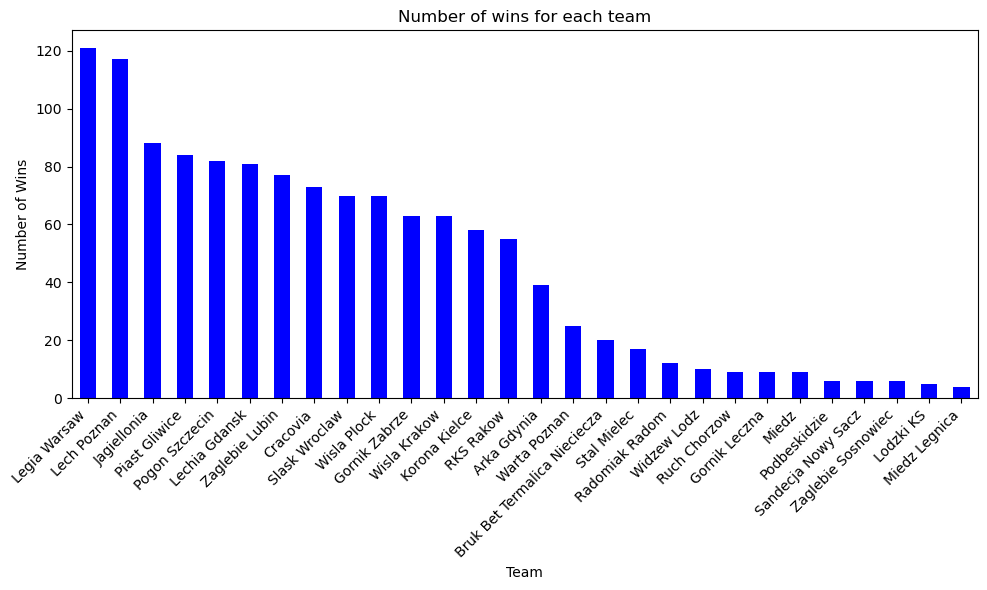

In [98]:
win_counts = df[df['Target'] == 2]['Team'].value_counts()

plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='blue')
plt.title('Number of wins for each team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Looking only at the number of wins during the last 5 years is not enough to evaluate accordingly which teams are the best in the league. For that, we should look at the percentage of wins for each team. 

We can see that currently there are 3 teams that are favored to win the league each year and are the strongest - Legia, Raków, and Lech.

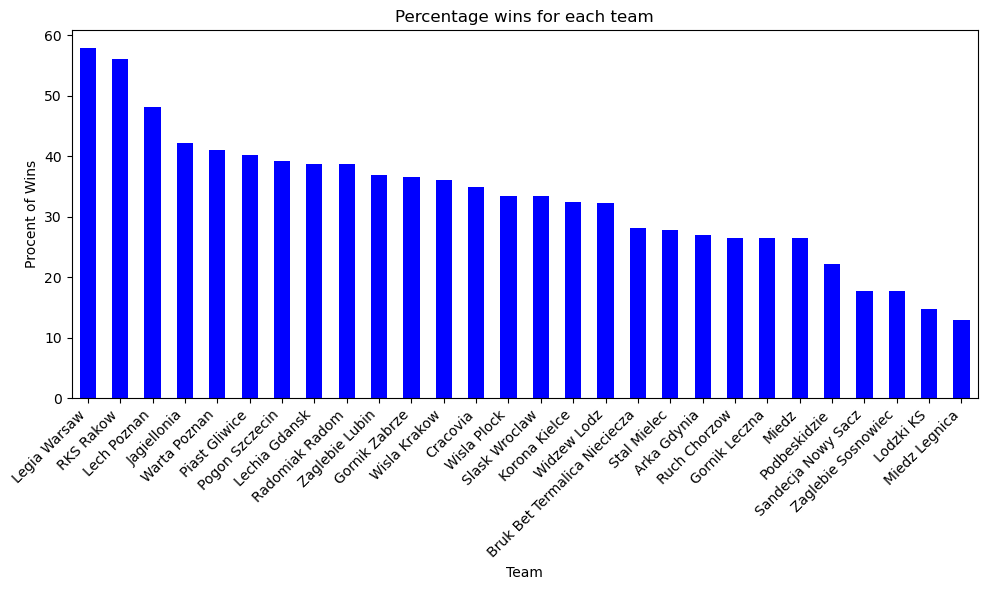

In [99]:
team_results = df.groupby('Team')['Target'].value_counts(normalize=True).unstack()
team_win_percent = (team_results[2] * 100)

plt.figure(figsize=(10, 6))
team_win_percent.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Percentage wins for each team')
plt.xlabel('Team')
plt.ylabel('Procent of Wins')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Looking at the draw percentage chart, you can see that most teams have a similar percentage of draws, except for Sandacja Nowy Sącz (currently the club plays in the second league) and Łódzki KS, which returned to the first league this year.

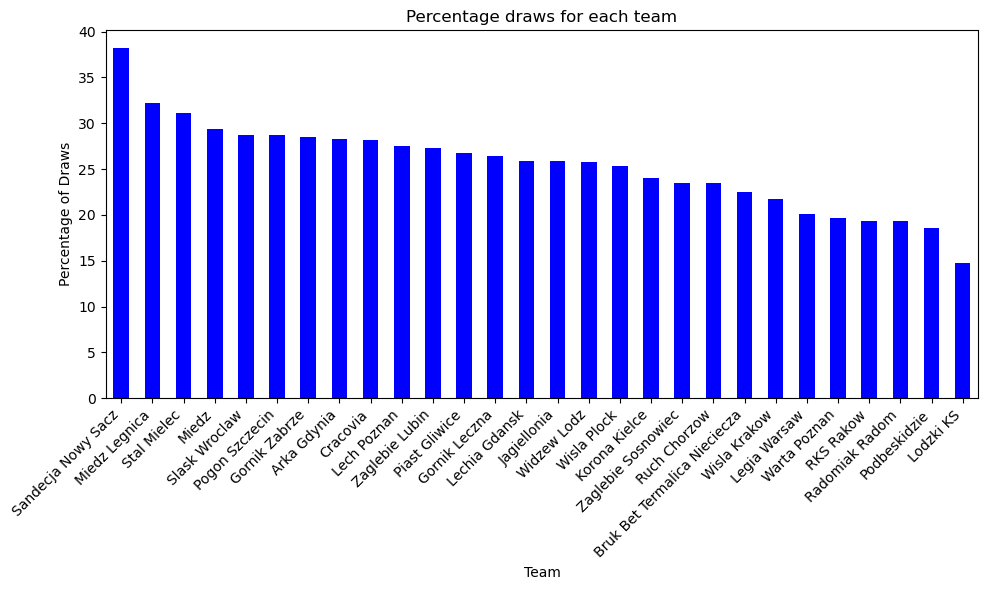

In [101]:
team_results = df.groupby('Team')['Target'].value_counts(normalize=True).unstack()
team_draw_percent = (team_results[0] * 100)

plt.figure(figsize=(10, 6))
team_draw_percent.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Percentage draws for each team')
plt.xlabel('Team')
plt.ylabel('Percentage of Draws')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We can see that draw is present in 1/4 of all matches.

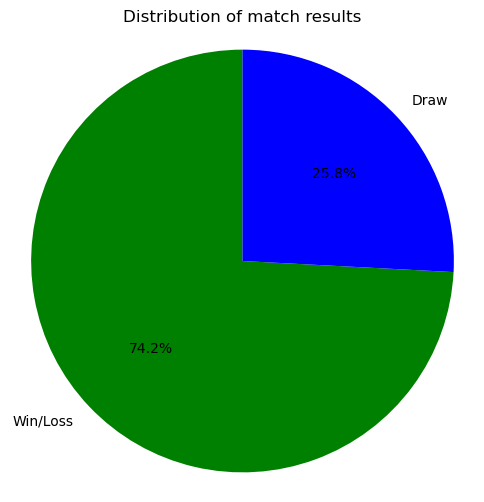

In [117]:
results = df['Target'].replace({2: 'Win/Loss', 1: 'Win/Loss', 0: 'Draw'}).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(results, labels=results.index, autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
plt.title('Distribution of match results')
plt.axis('equal')  

plt.show()

<Figure size 1000x1000 with 0 Axes>

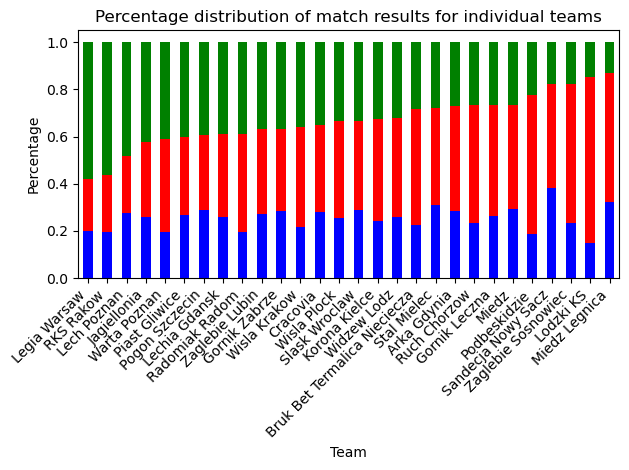

In [118]:
results = df['Target'].replace({2: 'Win', 1: 'Loss', 0: 'Draw'})
team_results = df.groupby('Team')['Target'].value_counts(normalize=True).unstack()

team_win_percent = (team_results[2] * 100)
team_win_percent = team_win_percent.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
team_results.loc[team_win_percent.index].plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], legend = None)
plt.title('Percentage distribution of match results for individual teams')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Training Model and Making Predictions

In [36]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split = 5)

In [37]:
train = df[df['Date'].dt.year < 2022]
test = df[df['Date'].dt.year == 2022]
predictors = ['CVenue', 'CDay', 'Hour', 'CReferee', 'COpponent']
rf.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [38]:
predictions = rf.predict(test[predictors])

In 38,5% cases prediction is right.

In [39]:
error = accuracy_score(test['Target'], predictions)
error

0.38557993730407525

In [83]:
combined = pd.DataFrame(dict(actual=test['Target'], predicted=predictions))
pd.crosstab(index=combined['actual'], columns=combined['predicted'])

predicted,0,1,2
actual,,,
0,7,31,32
1,16,58,40
2,12,52,62


I wanted to improve accuracy by adding rolling avaranges

In [41]:
grouped_df = df.groupby('Team')

In [42]:
def rolling_avg(group, cols, new_cols):
    group = group.sort_values('Date')
    rolling_values = group[cols].rolling(3, closed = 'left').mean()
    group[new_cols] = rolling_values
    group = group.dropna(subset=new_cols)
    return group

In [43]:
cols = ['GF', 'GA', 'PK', 'PKatt']
new_cols = [f'{c}_rolling' for c in cols]

In [44]:
df = df.groupby('Team').apply(lambda x: rolling_avg(x, cols, new_cols))

In [45]:
df = df.droplevel('Team')

In [46]:
df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Target,CVenue,CDay,Hour,CReferee,COpponent,GF_rolling,GA_rolling,PK_rolling,PKatt_rolling
3,2016-08-05,1900-01-01 18:00:00,Ekstraklasa,Regular season,Fri,Away,L,1,4,Jagiellonia,...,1,0,4,18,12,5,2.000000,0.666667,0.333333,0.333333
4,2016-08-13,1900-01-01 15:30:00,Ekstraklasa,Regular season,Sat,Home,W,2,0,Śląsk Wrocław,...,2,1,5,15,5,28,2.333333,1.333333,0.333333,0.333333
5,2016-08-20,1900-01-01 20:30:00,Ekstraklasa,Regular season,Sat,Away,W,3,1,Legia Warsaw,...,2,0,5,20,15,9,2.000000,1.333333,0.333333,0.333333
6,2016-08-27,1900-01-01 20:30:00,Ekstraklasa,Regular season,Sat,Home,D,1,1,Zagłębie Lubin,...,0,1,5,20,26,26,2.000000,1.666667,0.333333,0.333333
7,2016-09-10,1900-01-01 18:00:00,Ekstraklasa,Regular season,Sat,Away,L,0,1,Korona Kielce,...,1,0,5,18,5,6,2.000000,0.666667,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2019-04-29,1900-01-01 18:00:00,Ekstraklasa,Relegation round,Mon,Away,L,0,4,Górnik Zabrze,...,1,0,0,18,22,3,1.666667,2.000000,0.333333,0.333333
33,2019-05-05,1900-01-01 15:30:00,Ekstraklasa,Relegation round,Sun,Home,L,2,4,Śląsk Wrocław,...,1,1,6,15,21,28,1.333333,2.333333,0.333333,0.333333
34,2019-05-10,1900-01-01 18:00:00,Ekstraklasa,Relegation round,Fri,Away,L,0,2,Arka Gdynia,...,1,0,4,18,2,0,1.333333,3.000000,0.000000,0.000000
35,2019-05-14,1900-01-01 20:30:00,Ekstraklasa,Relegation round,Tue,Home,L,2,4,Korona Kielce,...,1,1,1,20,1,6,0.666667,3.333333,0.000000,0.000000


New accuracy is 41%.

In [66]:
train = df[df['Date'].dt.year < 2022]
test = df[df['Date'].dt.year == 2022]
predictors = ['CVenue', 'CDay', 'Hour', 'CReferee', 'COpponent', 'GF_rolling',	'GA_rolling',	'PK_rolling',	'PKatt_rolling']
rf.fit(train[predictors], train['Target'])
predictions = rf.predict(test[predictors])
error = accuracy_score(test['Target'], predictions)
error

0.4096774193548387

In [84]:
combined = pd.DataFrame(dict(actual=test['Target'], predicted=predictions))
pd.crosstab(index=combined['actual'], columns=combined['predicted'])

predicted,0,1,2
actual,,,
0,7,31,32
1,16,58,40
2,12,52,62


In [50]:
df1 = df

In [51]:
df1.head(1)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Target,CVenue,CDay,Hour,CReferee,COpponent,GF_rolling,GA_rolling,PK_rolling,PKatt_rolling
3,2016-08-05,1900-01-01 18:00:00,Ekstraklasa,Regular season,Fri,Away,L,1,4,Jagiellonia,...,1,0,4,18,12,5,2.0,0.666667,0.333333,0.333333


In [53]:
df.reset_index(inplace = True)

In [57]:
df = df.drop(columns = ['index'])

In [58]:
df.head(1)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Target,CVenue,CDay,Hour,CReferee,COpponent,GF_rolling,GA_rolling,PK_rolling,PKatt_rolling
0,2016-08-05,1900-01-01 18:00:00,Ekstraklasa,Regular season,Fri,Away,L,1,4,Jagiellonia,...,1,0,4,18,12,5,2.0,0.666667,0.333333,0.333333
